### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
%matplotlib inline

### Import data

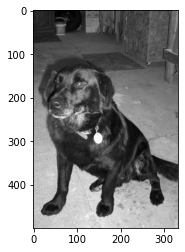

In [2]:
DATADIR = './Data/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to images dir
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap='gray')
        plt.show()
        break
    break

In [3]:
print(img_arr.shape)

(500, 333)


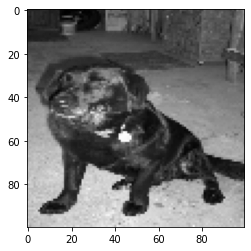

In [4]:
IMG_SIZE = 100

new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_arr, cmap='gray')
plt.show()

### Prepare data

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to images dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try: 
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_arr, class_num])
            except Exception as e:
                pass
            
create_training_data()

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


In [6]:
print(len(training_data))

24913


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
1
1
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

### Export data

In [11]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [13]:
X[1]

array([[[134],
        [135],
        [135],
        ...,
        [135],
        [133],
        [129]],

       [[135],
        [135],
        [135],
        ...,
        [137],
        [136],
        [132]],

       [[137],
        [137],
        [136],
        ...,
        [137],
        [137],
        [133]],

       ...,

       [[184],
        [178],
        [178],
        ...,
        [114],
        [113],
        [112]],

       [[186],
        [187],
        [193],
        ...,
        [121],
        [124],
        [122]],

       [[172],
        [179],
        [191],
        ...,
        [114],
        [112],
        [113]]], dtype=uint8)

In [20]:
y[10]

1